In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os
from skimage import measure
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


ds = xr.open_dataset('/home/sebastian/Documentos/analisisNETCDF/ivt_s_6_2022_Jan.nc')
df = ds.to_dataframe()



# Filtrar valores mayores a 250
df_filtered = df.loc[df['ivt'] > 250]

# Resetear el índice y agregar el número como índice al principio
df_filtered.reset_index(inplace=True)
df_filtered.index += 1

# Renombrar el nombre de la columna de índice
df = df_filtered.rename_axis("Index", axis="columns")

# Imprimir el DataFrame
print(df)

Index                  time  latitude  longitude         ivt
1       2022-01-01 00:00:00    -57.75     -54.25  251.807892
2       2022-01-01 00:00:00    -57.75     -54.00  256.242828
3       2022-01-01 00:00:00    -57.75     -53.75  256.437347
4       2022-01-01 00:00:00    -57.75     -53.50  256.694092
5       2022-01-01 00:00:00    -57.75     -53.25  254.901627
...                     ...       ...        ...         ...
2483966 2022-01-31 18:00:00     15.00     -26.00  268.630615
2483967 2022-01-31 18:00:00     15.00     -25.75  276.027283
2483968 2022-01-31 18:00:00     15.00     -25.50  281.533051
2483969 2022-01-31 18:00:00     15.00     -25.25  289.593353
2483970 2022-01-31 18:00:00     15.00     -25.00  293.868347

[2483970 rows x 4 columns]


La imagen se ha guardado en datosGRFICADOS/grafico_2022-01-01.png


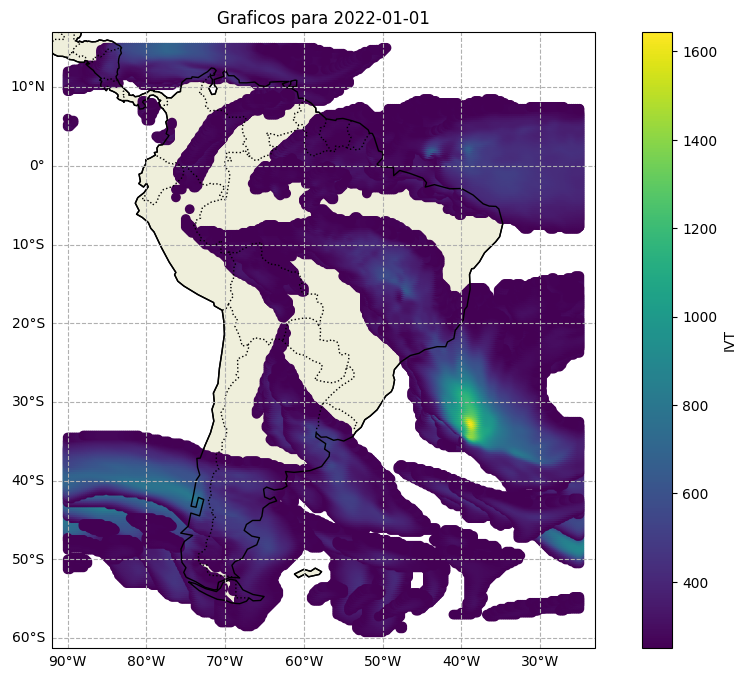

In [11]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.gridliner as gridliner

# Filtrar los datos para la fecha "2022-01-01"
fecha_seleccionada = "2022-01-01"
df_filtrado = df[df["time"].dt.date == pd.to_datetime(fecha_seleccionada).date()]

# Crear la carpeta para guardar las imágenes si no existe
carpeta_guardado = "datosGRFICADOS"
if not os.path.exists(carpeta_guardado):
    os.makedirs(carpeta_guardado)

# Crear la figura y los ejes con proyección cartográfica y ajustar el tamaño
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 8))

# Agregar el mapa de fondo
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# Establecer límites para el gráfico de dispersión
ax.set_xlim(df_filtrado["longitude"].min() - 2, df_filtrado["longitude"].max() + 2)
ax.set_ylim(df_filtrado["latitude"].min() - 2, df_filtrado["latitude"].max() + 2)

# Agregar líneas de latitud y longitud con intervalos de 10 grados
gl = ax.gridlines(draw_labels=True, linestyle='--', xlocs=np.arange(-180, 180, 10), ylocs=np.arange(-90, 90, 10))
gl.top_labels = False
gl.right_labels = False
gl.xformatter = gridliner.LONGITUDE_FORMATTER
gl.yformatter = gridliner.LATITUDE_FORMATTER

# Visualización en 2D (scatter plot)
scatter = ax.scatter(df_filtrado["longitude"], df_filtrado["latitude"], c=df_filtrado["ivt"], cmap="viridis")

# Configuraciones adicionales
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Graficos para {fecha_seleccionada}")

# Agregar la barra de colores
plt.colorbar(scatter, label="IVT")

# Guardar la imagen en la carpeta "datosGRFICADOS"
nombre_archivo = f"{carpeta_guardado}/grafico_{fecha_seleccionada}.png"
plt.savefig(nombre_archivo)

# Imprimir un mensaje indicando que la imagen ha sido guardada
print(f"La imagen se ha guardado en {nombre_archivo}")

# Mostrar la imagen en lugar de guardarla
plt.show()

